In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
from PIL import Image

In [2]:
df = pd.read_csv('src/data/grailed.csv')

In [3]:
colordf = pd.read_csv('./src/data/colors.csv')

## Data Cleaning

In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
df.dropna(subset = ['Location'], inplace= True)

In [6]:
# Converting and reformatting price columns

def dollars_to_int(column):
    column = column.str.replace('$', '')
    column = column.str.replace(',', '')
    return pd.to_numeric(column) 

df.Price = dollars_to_int(df.Price)
df.NewPrice = dollars_to_int(df.NewPrice)
df.OldPrice = dollars_to_int(df.OldPrice)

In [7]:
# Reformatting current number of listings column and filling NaN values

def format_listings(column):
    listings = []
    for i in column:
        try:
            listings.append(int(i.split()[0]))
        except AttributeError:
            listings.append(i)
    return listings

df.CurrentListings = format_listings(df.CurrentListings)
df.CurrentListings.fillna(0, inplace=True)

In [8]:
# Creating dummy columns for every size

size_dummies = pd.get_dummies(df.Size)
df.drop(columns= 'Size', inplace = True)
size_dummies.drop(columns = 'XXS', inplace = True)

In [9]:
df = pd.concat([df, size_dummies], axis = 1)

In [10]:
df.Price.fillna(df.NewPrice, inplace = True)

In [11]:
df['PriceDropped'] = df.OldPrice = df.NewPrice

In [12]:
df['PriceDropped'].fillna(0, inplace = True)

In [13]:
df.drop(columns = ['OldPrice', 'NewPrice'], inplace = True)

In [14]:
df.Location = df.Location.str.replace('Shipping: ', '')
df.Location = df.Location.str.replace(' to', '')

In [15]:
loc_dummies = pd.get_dummies(df.Location)

In [16]:
loc_dummies.drop(columns = ['- Ask for shipping', 'Add a comment'], inplace = True)

In [17]:
df = pd.concat([df, loc_dummies], axis = 1)

In [18]:
df.Feedback = df.Feedback.str.replace(' Feedback', '')

In [19]:
df.Feedback = pd.to_numeric(df.Feedback)
df.Feedback.fillna(0, inplace = True)

In [20]:
df.Sold = df.Sold.str.replace('(', '')
df.Sold = df.Sold.str.replace(')', '')
df.Sold = pd.to_numeric(df.Sold)
df.Sold.fillna(0, inplace = True)

In [21]:
df.FollowerCount.fillna(0, inplace = True)

In [24]:
for i, name in enumerate(df.Designer):
    name = str(name)
    name.strip()
    if 'NIKE' in name:
        df.Designer[i] = 'NIKE'
    elif 'ADIDAS' in name:
        df.Designer[i] = 'ADIDAS'
    elif 'COMME DES GARCONS' in name:
        df.Designer[i] = 'COMME DES GARCONS'
    elif 'SUPREME' in name:
        df.Designer[i] = 'SUPREME'
    elif 'PALACE' in name:
        df.Designer[i] = 'PALACE'
    elif 'CHROME' in name:
        df.Designer[i] = 'CHROME HEARTS'
    elif 'FEAR' in name:
        df.Designer[i] = 'FEAR OF GOD'
    elif 'WHITE' in name:
        df.Designer[i] = 'OFF WHITE'
    elif 'KAPITAL' in name:
        df.Designer[i] = 'KAPITAL'
    elif 'BAPE' in name:
        df.Designer[i] = 'BAPE'
    elif 'KANYE' in name or 'YEEZY' in name:
        df.Designer[i] = 'YEEZY SEASON'
    elif 'LAUREN' in name:
        df.Designer[i] = 'RALPH LAUREN'
    elif 'ISSEY' in name or 'YAMAMOTO' in name or 'JAPANESE DESIGNER' in name:
        df.Designer[i] = 'JAPANESE DESIGNER'
    elif 'LAURENT' in name:
        df.Designer[i] = 'SAINT LAURENT'
    elif 'ACNE' in name:
        df.Designer[i] = 'ACNE STUDIOS'
    elif 'RAF' in name:
        df.Designer[i] = 'RAF SIMMONS'
    elif 'VETEMENTS' in name:
        df.Designer[i] = 'VETEMENTS'
    elif 'GIVENCHY' in name:
        df.Designer[i] = 'GIVENCHY'
    elif 'OWENS' in name:
        df.Designer[i] = 'RICK OWENS'
    elif 'GUCCI' in name:
        df.Designer[i] = 'GUCCI'
    elif 'PRADA' in name:
        df.Designer[i] = 'PRADA'
    elif 'MARGIELA' in name:
        df.Designer[i] = 'MAISON MARGIELA'
    elif 'UNIQLO' in name:
        df.Designer[i] = 'UNIQLO'
    elif 'SOCIAL' in name:
        df.Designer[i] = 'ANTI SOCIAL SOCIAL CLUB'
    elif 'STUSSY' in name:
        df.Designer[i] = 'STUSSY'
    elif 'DISNEY' in name:
        df.Designer[i] = 'DISNEY'
    elif 'CHAMPION' in name:
        df.Designer[i] = 'CHAMPION'
    elif 'HAWAIIAN' in name or 'CRAZY SHIRTS' in name or 'SURF' in name:
        df.Designer[i] = 'HAWAIIAN SHIRT'
    elif 'BAND TEES' in name:
        df.Designer[i] = 'BAND TEES'
    elif 'JAPANESE BRAND' in name:
        df.Designer[i] = 'JAPANESE BRAND'
    elif 'STREETWEAR' in name:
        df.Designer[i] = 'STREETWEAR'
    elif 'VINTAGE' in name:
        df.Designer[i] = 'VINTAGE'
    else:
        df.Designer[i] = 'MISC'
    

In [25]:
df.Designer.sort_values().unique()

array(['ACNE STUDIOS', 'ADIDAS', 'ANTI SOCIAL SOCIAL CLUB', 'BAND TEES',
       'BAPE', 'CHAMPION', 'CHROME HEARTS', 'COMME DES GARCONS', 'DIOR',
       'DISNEY', 'FEAR OF GOD', 'GIVENCHY', 'GUCCI', 'HAWAIIAN SHIRT',
       'JAPANESE BRAND', 'JAPANESE DESIGNER', 'KAPITAL',
       'MAISON MARGIELA', 'MISC', 'NIKE', 'OFF WHITE', 'PALACE', 'PRADA',
       'RAF SIMMONS', 'RALPH LAUREN', 'RICK OWENS', 'STREETWEAR',
       'STUSSY', 'SUPREME', 'UNIQLO', 'VETEMENTS', 'VINTAGE',
       'YEEZY SEASON'], dtype=object)

In [26]:
designers = pd.get_dummies(df.Designer)

In [27]:
designers.drop(columns= 'DISNEY', inplace = True)
df = pd.concat([df, designers], axis = 1)

In [28]:
df = df.dropna(subset=['Name'])

In [29]:
colordf.set_index('Unnamed: 0', inplace = True)

In [30]:
maindf = df.merge(colordf, left_index=True, right_index=True)

In [59]:
maindf['0'] = maindf['0'].apply(lambda x: eval(x))
maindf['1'] = maindf['1'].apply(lambda x: eval(x))
maindf['2'] = maindf['2'].apply(lambda x: eval(x))

## EDA

In [78]:
import scipy.spatial.distance as dist

In [80]:
dist.euclidean(maindf['0'][0], maindf['0'][1])

37.815340802378074

In [210]:
def find_closest_colors(list_of_tuples, list_of_columns, dataframe, number_of_rows):
    output = []
    for i in dataframe.index:
        output.append((sum(
            [dist.euclidean(list_of_tuples[0], list_of_columns[0][i]),
            dist.euclidean(list_of_tuples[1], list_of_columns[1][i]),
            dist.euclidean(list_of_tuples[2], list_of_columns[2][i])]), i))
    indices = [i[1] for i in sorted(output)[0:5]]
    return dataframe.iloc[indices]

In [211]:
list_of_tuples = [maindf['0'][0], maindf['1'][0], maindf['2'][0]]
list_of_columns = [maindf['0'], maindf['1'], maindf['2']]
list_of_tuples

[(218, 196, 167), (114, 107, 138), (123, 124, 118)]

In [212]:
find_closest_colors(list_of_tuples, list_of_columns, maindf, 5)

,Name,Designer,Price,Time,LastBump,Link,Username,Sold,Feedback,CurrentListings,...,STREETWEAR,STUSSY,SUPREME,UNIQLO,VETEMENTS,VINTAGE,YEEZY SEASON,0,1,2
0,Bape Varsity style Jacket Bathing Ape,BAPE,155.0,about 14 hours ago,NaN,https://www.grailed.com/listings/18766603-bape...,oghypeshop,122.0,77.0,59.0,...,0,0,0,0,0,0,0,"(218, 196, 167)","(114, 107, 138)","(123, 124, 118)"
168,Vlone Neighborhood Skull Tee,NEIGHBORHOOD × VLONE,135.0,2 days ago,NaN,https://www.grailed.com/listings/18739497-neig...,nateszn,172.0,84.0,11.0,...,0,0,0,0,0,0,0,"(181, 141, 139)","(111, 122, 135)","(83, 94, 113)"
2228,North Face Never Stop Exploring Hoodie,THE NORTH FACE,22.0,14 minutes ago,(7 days),https://www.grailed.com/listings/18626417-the-...,dominicschlossberg,8.0,0.0,16.0,...,0,0,0,0,0,1,0,"(188, 186, 183)","(124, 132, 124)","(124, 124, 132)"
8533,Vintage Patagonia Big Logo Hoodie,PATAGONIA × VINTAGE,72.0,3 months ago,(4 months),https://www.grailed.com/listings/16345499-pata...,ildargabidull4709,69.0,30.0,70.0,...,0,0,0,0,0,0,0,"(34, 137, 204)","(110, 112, 117)","(98, 109, 114)"
5634,Head🔥Guess Spellout Big Logo Tees,GUESS,200.0,about 1 hour ago,(23 days),https://www.grailed.com/listings/18252620-gues...,Vaultwearism,161.0,84.0,1015.0,...,0,0,0,0,0,1,0,"(197, 171, 153)","(106, 110, 138)","(124, 124, 116)"


In [227]:
def display_closest_colors(item_index, list_of_columns, dataframe):
    
    # Get RGB data from the target item
    tuples = [list_of_columns[0][item_index],
              list_of_columns[1][item_index],
              list_of_columns[2][item_index]]
    
    # Create and empty list for euclidean distance
    output = []
    
    # Iterate through the dataframe and find euclidean distance between each of the colors of
    # each item in the dataframe and the target, then calculate the total distance between all
    # three colors. Save to the list as a tuple- the first value is the sum Euclidean distance,
    # the second is the index of the item
    for i in dataframe.index:
        output.append((sum(
            [dist.euclidean(tuples[0], list_of_columns[0][i]),
            dist.euclidean(tuples[1], list_of_columns[1][i]),
            dist.euclidean(tuples[2], list_of_columns[2][i])]), i))
    
    # Sort the euclidean distances and pull the 6 closest entries (the first one will always be
    # target item as its distance to itself is 0)
    indices = [i[1] for i in sorted(output)[0:7]]
    images = []
    
    # Open the images from each of the closest images
    for i in indices:
        images.append(Image.open(f'./src/images/{i}.jpg'))

    # Display the original image and top five closest
    fig, ax = plt.subplots(2, 3, figsize = (10,6))

    ax[0,0].imshow(images[0])
    ax[0,0].set_title('Original Image')
    ax[0,1].imshow(images[2])
    ax[0,2].imshow(images[3])
    ax[1,0].imshow(images[4])
    ax[1,1].imshow(images[5])
    ax[1,2].imshow(images[6])
    
    return plt.show()

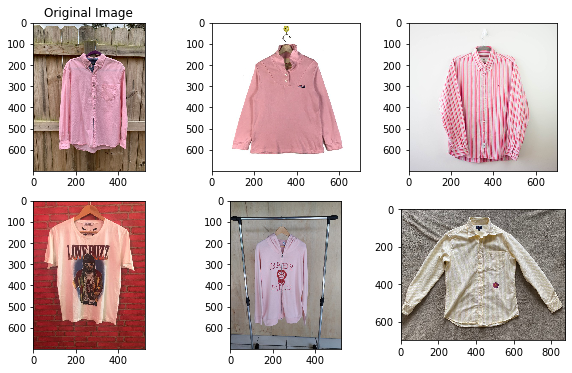

In [233]:
display_closest_colors(2713, list_of_columns, maindf)

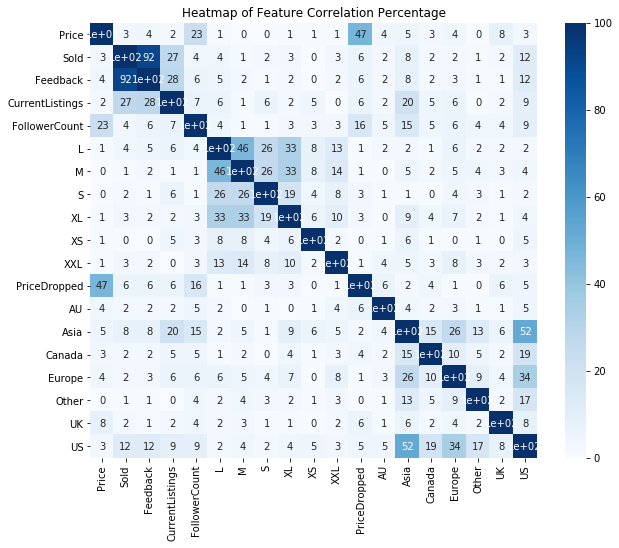

In [76]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap((round(abs(df[['Name', 'Designer', 'Price', 'Time', 'LastBump', 'Link', 'Username',
       'Sold', 'Feedback', 'CurrentListings', 'Description', 'ProfileLink',
       'FeedbackLink', 'FollowerCount', 'FullSize', 'PostedTime', 'BumpedTime',
       'Location', 'L', 'M', 'S', 'XL', 'XS', 'XXL', 'PriceDropped', 'AU',
       'Asia', 'Canada', 'Europe', 'Other', 'UK', 'US']].corr()), 2)*100), annot = True, cmap = 'Blues')
plt.title('Heatmap of Feature Correlation Percentage');

In [31]:
import nltk
from nltk import RegexpTokenizer

[nltk_data] Downloading package punkt to /Users/nicksubic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df.Description

0        Bape Varsity Jacket\nSize M fits true\nRelease...
1        Brand : Vintage Nike sunfaded mini swoosh blac...
2        Comes des garçons black hoodie\nFrom Dover str...
3        90s Faded Uni Blank Tee. Size Medium.\nPit To ...
4        Mens medium\nGood condition other than some we...
                               ...                        
10095    Thanks for favorites our store so that you wil...
10096    Rare!! SUZUKI Sweatshirt Crewneck Small Logo M...
10097             New, never worn. Condition 10/10, size M
10098    90' S Champion Spellout Big Logo Reverse Weave...
10099    Used and signs of wear on buttons as pictured....
Name: Description, Length: 10000, dtype: object

In [33]:
tokenizer = RegexpTokenizer(r'[a-zA-Z][^0-9\/]+')

df['TokenizedDesc'] = df.Description.apply(lambda x: nltk.word_tokenize(x.lower()))
# TF-IDF tokenizer? Rem stopwords

In [34]:
df.TokenizedDesc

0        [bape, varsity, jacket, size, m, fits, true, r...
1        [brand, :, vintage, nike, sunfaded, mini, swoo...
2        [comes, des, garçons, black, hoodie, from, dov...
3        [90s, faded, uni, blank, tee, ., size, medium,...
4        [mens, medium, good, condition, other, than, s...
                               ...                        
10095    [thanks, for, favorites, our, store, so, that,...
10096    [rare, !, !, suzuki, sweatshirt, crewneck, sma...
10097    [new, ,, never, worn, ., condition, 10/10, ,, ...
10098    [90, ', s, champion, spellout, big, logo, reve...
10099    [used, and, signs, of, wear, on, buttons, as, ...
Name: TokenizedDesc, Length: 10000, dtype: object

In [54]:
df_model = maindf[['Price', 
                 'Sold', 
                 'Feedback', 
                 'CurrentListings', 
                 'FollowerCount', 
                 'L', 'M', 'S', 'XL', 'XS', 'XXL',
                 'PriceDropped',
                 'AU', 'Asia', 'Canada', 'Europe', 'UK', 'US',
                 'ACNE STUDIOS',
                 'ADIDAS',
                 'ANTI SOCIAL SOCIAL CLUB',
                 'BAND TEES',
                 'BAPE',
                 'CHAMPION',
                 'CHROME HEARTS', 
                 'COMME DES GARCONS', 
                 'FEAR OF GOD', 
                 'GIVENCHY', 
                 'GUCCI', 
                 'HAWAIIAN SHIRT', 
                 'JAPANESE BRAND', 
                 'JAPANESE DESIGNER', 
                 'KAPITAL', 
                 'MAISON MARGIELA', 
                 'MISC', 
                 'NIKE', 
                 'OFF WHITE', 
                 'PALACE', 
                 'PRADA', 
                 'RAF SIMMONS', 
                 'RALPH LAUREN', 
                 'RICK OWENS', 
                 'STREETWEAR', 
                 'STUSSY', 
                 'SUPREME', 
                 'UNIQLO',
                 'VETEMENTS', 
                 'VINTAGE', 
                 'YEEZY SEASON']]

## Linear Modeling

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
import seaborn as sns

In [57]:
X = df_model.drop(columns = 'Feedback')
y = df_model.Feedback

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [58]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

ValueError: setting an array element with a sequence.

In [63]:
print('Train RMSE: ', mean_squared_error(y_train, y_pred)**.5)
# print('Test RMSE: ', mean_squared_error(y_test, y_test_pred**.5))

Train RMSE:  175.09128118103038


In [65]:
pca = PCA()

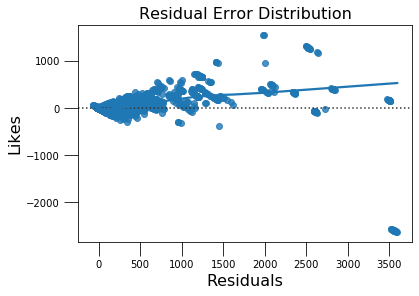

In [69]:
sns.residplot(y_pred, y_train, lowess=True)
plt.xlabel('Residuals', fontsize = 16)
plt.ylabel('Likes', fontsize = 16)
plt.title('Residual Error Distribution', fontsize = 16)
plt.tick_params(size = 14)

In [ ]:
# Correlation Matrix
# PCA
# K-Means Clustering?
# VIF analysis?
# Recursive Feature Elimination?